In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from google.colab import drive


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt




In [6]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/Telocom_churn_prediction/Data/WA_Fn-UseC_-Telco-Customer-Churn.csv') # add path of dataset from your local environment.
df.head()
for col in df :
  print(col)
#df.sample(5)
df.drop('customerID',axis = 'columns',inplace = True)
print(df.dtypes)

customerID
gender
SeniorCitizen
Partner
Dependents
tenure
PhoneService
MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
PaperlessBilling
PaymentMethod
MonthlyCharges
TotalCharges
Churn
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [7]:
df.TotalCharges.values
#pd.to_numeric(df.TotalCharges)
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()
#current shape of df # 7043
df.shape
#updated our df for the null rows for total charges.
df1 = df[df.TotalCharges != ' ']
print(df1.sample(5))
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

print(df1.dtypes)


      gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
2015  Female              0     Yes        Yes      28          Yes   
3459  Female              0     Yes        Yes      30          Yes   
1170    Male              0     Yes        Yes      72          Yes   
5492  Female              0     Yes        Yes      65          Yes   
6322  Female              0      No         No       4          Yes   

     MultipleLines InternetService       OnlineSecurity         OnlineBackup  \
2015           Yes             DSL                   No                   No   
3459           Yes              No  No internet service  No internet service   
1170           Yes     Fiber optic                  Yes                  Yes   
5492           Yes              No  No internet service  No internet service   
6322            No     Fiber optic                   No                   No   

         DeviceProtection          TechSupport          StreamingTV  \
2015                 

<ipython-input-7-2d22beed0ed7>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


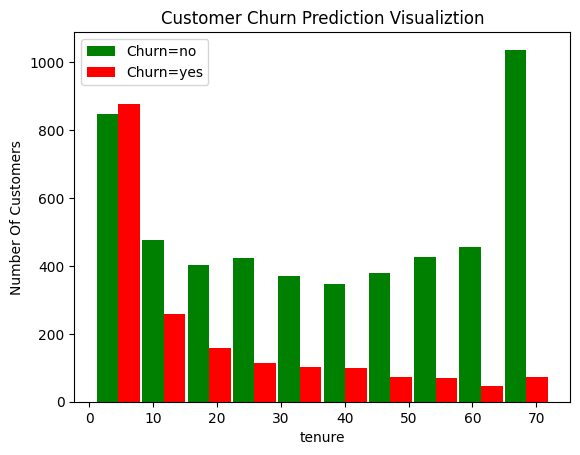

In [8]:
# encoding other attributes.
churn_no_tenure = df1[df1.Churn == "No" ].tenure
churn_yes_tenure = df1[df1.Churn == "Yes" ].tenure
plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")
plt.hist([churn_no_tenure, churn_yes_tenure], rwidth=0.95, color=['green','red'],label=['Churn=no','Churn=yes'])
plt.legend()



clearly churn seems to decrease as the tenure increases:.

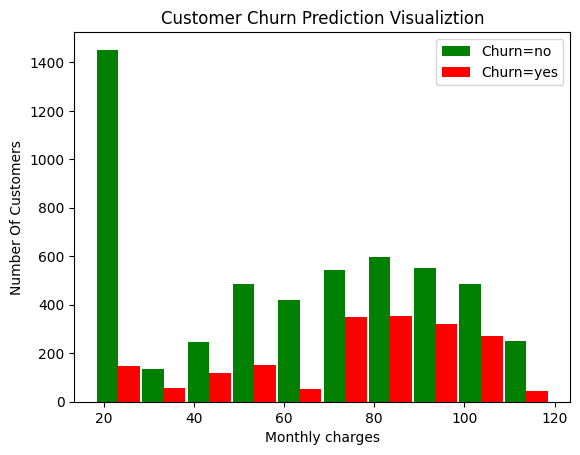

In [9]:
# visulalizing similarly on monthly charges.
mc_churn_yes = df1[df1.Churn == 'Yes'].MonthlyCharges
mc_churn_no = df1[df1.Churn == 'No'].MonthlyCharges
plt.xlabel("Monthly charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")
plt.hist([mc_churn_no, mc_churn_yes], rwidth=0.95, color=['green','red'],label=['Churn=no','Churn=yes'])
plt.legend()


In [10]:
# printing unique values of each object column
def unique_values(df):
  for col in df:
    if df[col].dtypes == 'object':
      print(f'{col}: {df[col].unique()}')

df1.replace ('No phone service','No',inplace = True)
df1.replace ('No internet service','No',inplace = True)

print(unique_values(df1))

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']
None


<ipython-input-10-9ad4ecce1037>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace ('No phone service','No',inplace = True)
<ipython-input-10-9ad4ecce1037>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace ('No internet service','No',inplace = True)


In [11]:
# encoding columns with yes and no values to 1 and 0.
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)
df1.head()

<ipython-input-11-26ddf4c501a6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({'Yes': 1,'No': 0},inplace=True)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [12]:
# dealing with other columns
df1['gender'].replace({'Female':1,'Male':0},inplace=True)
df1.gender.unique()
# one hot encoding other categorical columns.
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2.columns

<ipython-input-12-a32184da9d78>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace({'Female':1,'Male':0},inplace=True)


Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [13]:
df2.head(10)
# entire encoding is performed .

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
5,1,0,0,0,8,1,1,0,0,1,...,0,1,0,1,0,0,0,0,1,0
6,0,0,0,1,22,1,1,0,1,0,...,0,1,0,1,0,0,0,1,0,0
7,1,0,0,0,10,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,1
8,1,0,1,0,28,1,1,0,0,1,...,0,1,0,1,0,0,0,0,1,0
9,0,0,0,1,62,1,0,1,1,0,...,1,0,0,0,1,0,1,0,0,0


In [14]:
df2.dtypes
# performing scaling .
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']
import sklearn
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])
print(df2.dtypes)
print(df2.head())

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                     float64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [15]:
# spliting the data in train test samples.
x = df2.drop('Churn',axis = 'columns')
y = df2['Churn']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=5)
X_test

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2660,0,0,0,1,0.169014,1,0,1,0,0,...,1,0,0,1,0,0,0,1,0,0
744,1,0,0,0,0.056338,1,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
5579,1,0,1,1,0.971831,1,1,1,1,1,...,0,1,0,0,0,1,1,0,0,0
64,1,0,0,0,0.112676,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
3287,0,0,1,1,0.253521,1,1,0,0,0,...,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024,0,0,0,0,0.154930,1,0,0,0,1,...,0,1,0,0,1,0,0,0,1,0
4396,0,1,0,0,0.000000,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
4081,1,0,0,0,0.000000,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
1297,1,0,0,0,0.056338,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [16]:
# creating the ANN
import tensorflow as tf
from tensorflow import keras
model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
]
)
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
176/176 [==============================] - 1s 2ms/step - loss: 0.5121 - accuracy: 0.7554
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4270 - accuracy: 0.7970
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4178 - accuracy: 0.8018
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4142 - accuracy: 0.8044
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4113 - accuracy: 0.8059
Epoch 6/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4090 - accuracy: 0.8066
Epoch 7/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4071 - accuracy: 0.8068
Epoch 8/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4051 - accuracy: 0.8092
Epoch 9/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4038 - accuracy: 0.8089
Epoch 10/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4021 - accura

In [17]:
model.evaluate(X_test, y_test)
y_pred = []
yp = model.predict(X_test)
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

44/44 [==============================] - 0s 1ms/step


In [18]:
y_pred[:10]

[0, 1, 0, 1, 0, 1, 0, 0, 0, 0]

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       999
           1       0.62      0.52      0.56       408

    accuracy                           0.77      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.76      0.77      0.76      1407



Text(95.72222222222221, 0.5, 'Truth')

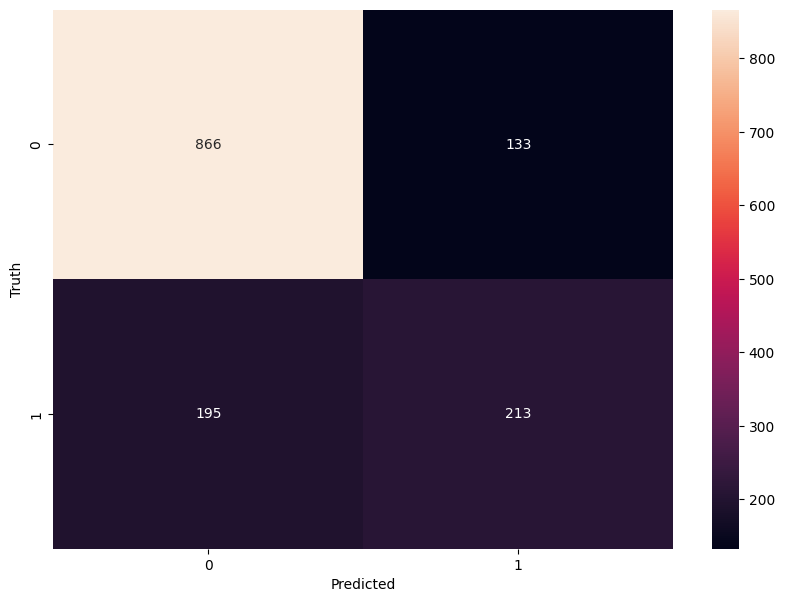

In [19]:

y_test[:10]
from sklearn.metrics import confusion_matrix , classification_report
print(classification_report(y_test,y_pred))
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [22]:
# hense therefore model achived with accuracy of around 78%
from tensorflow.keras.models import save_model

In [23]:
save_model(model, '/content/drive/MyDrive/Datasets/Telocom_churn_prediction/Model/telco_churn.h5') #address to location of model to be saved.

<ipython-input-23-35c7fc3648e1>:1: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(model, '/content/drive/MyDrive/Datasets/Telocom_churn_prediction/Model/telco_churn.h5')
